In [2]:
!jt -t oceans16

In [1]:
import numpy as np
from random import random

In [2]:
import scipy.io as sio
Hm1 = sio.loadmat('F:\sem 2\ct111\ct project\Hmatrix.mat')
H_mat1 = Hm1['H']

In [7]:
Hm2 = sio.loadmat('F:\sem 2\ct111\ct project\Hmatrix2.mat')
H_mat2 = Hm2['H']

In [8]:
import matplotlib.pyplot as plt

In [4]:
#for running this code we want to notify you that before run cells of Monte Carlo simulation function and ploting the graph, you first need to run two cells below the ploting cell, which are traversing the H matrix and our bsc_decoder function 

In [5]:
(h_r,h_c) = H_mat1.shape
print(h_r)
print(h_c)

3792
5056


In [9]:
(h_r,h_c) = H_mat2.shape
print(h_r)
print(h_c)

3000
5000


In [ ]:
#Monte Carlo simulation
#error prbability
p = np.linspace(0,1,11)

pcorr = [];

Nsim = 100
perr = []

#number of message bits in recived message.
size = 5056

trans = [0 for x in range(size)]

for i in range(11):
    
    n_err = 0
    n_corr = 0
    for j in range(Nsim):
        Message=[]
        for k in range(size):
            #for inserting errors in message using cross-over probability.
            if(random()>1-p[i]):
                 Message.append(1)
            else:
                 Message.append(0)
        
        Message = np.array(Message)
        ans = bsc_decoder(Message)
        ans = list(ans);
        if(ans == trans):
            n_corr = n_corr + 1;
        else:
            n_err = n_err + 1; 
    perr.append(n_err/Nsim)
    pcorr.append(n_corr/Nsim)


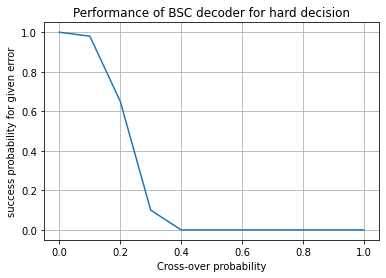

In [20]:
plt.plot(p,pcorr)
plt.title("Performance of BSC decoder for hard decision")
plt.xlabel("Cross-over probability")
plt.ylabel("success probability for given error")
plt.grid()

In [10]:
H = np.array([[1,0,0,0,0,1,0,1,0,1,0,0],
              [1,0,0,1,1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,1,0,1,0,0,0],
              [0,0,1,0,0,0,1,1,0,0,0,1],
              [0,0,1,0,0,1,0,0,0,0,1,1],
              [0,1,0,0,1,0,0,0,1,0,1,0],
              [1,0,0,1,0,0,1,0,0,1,0,0],
              [0,1,0,0,0,1,0,1,0,1,0,0],
              [0,0,1,1,0,0,0,0,1,0,0,1]])

(row_h,col_h) = H_mat1.shape;
   
dc = 0
dv = 0

#for taking values of dc and dv.
for i in range(row_h):
    if(H_mat1[i,0] == 1):
        dv = dv + 1
        
for i in range(col_h):
    if(H_mat1[0,i] == 1):
        dc = dc + 1

#for getting all values of VNs which are connected to particular CN.
check = np.zeros((row_h,dc))+-1;


#for getting index of all VNs which are connected to particuler CN.
index = np.zeros((row_h,dc))+-1;


for i in range(row_h):

    #to indicate number of VNs connected to particulare CN.
    f = -1;
    for j in range(col_h):
        if(H_mat1[i,j] == 1):
            f = f + 1
            index[i,f] = j



In [15]:
def bsc_decoder(message):
    
    (row_c,col_c) = check.shape
    
    #copy of our message which we return at end.
    ans = np.zeros(len(message))

    
    #copy of our message which we return at end.
    ans = message
    
    for i in range(row_c):

          for j in range(col_c):
            check[i,j] = ans[int(index[i,j])]
    
    
    count = 0;

    #number of max itrations.
    while(count < 10):
        
        count = count + 1
        
                    
        #to store every predicted value for particular VN by its CNs.
        Vn = np.zeros((len(ans),dv))+-1

        #counter which knows how many pridicted values store in VN form each CN.
        dh = np.zeros(len(ans))
        
        for i in range(row_c):

            for j in range(col_c):
                sum1 = 0

                #4
                for k in range(col_c):

                    if(k == j):
                        continue
                    
                    sum1 = sum1 + check[i,k]
                    

                sum1 = sum1%2
                

                Vn[int(index[i,j]),int(dh[int(index[i,j])])] = sum1
                
                #counter to store number of Cns connedcted to VNs
                dh[int(index[i,j])] = dh[int(index[i,j])] + 1

                
                
        #majority voting.
        (row_v,col_v) = Vn.shape;
                        
        for i in range(row_v): 
            
            temp1 = np.count_nonzero(Vn[i,:int(dh[i])])
            temp0 = np.size(Vn[i,:int(dh[i])]) - np.count_nonzero(Vn[i,:int(dh[i])])
            
            if(message[i] == 0):
                temp0 = temp0 + 1
            
            else:
                temp1 = temp1 +1
        
            if(temp0 >= temp1):
                ans[i] = 0
            else:
                ans[i] = 1
        
        #VNs to CNs
        
        #counter for values of VNs which they dispatch to their respective CNs.
        co = np.zeros(row_v);
        for i in range(row_c):
            for j in range(dc):
                
                temp1 = 0
                temp0 = 0
                
                #number of 1's in pridicted values of VNs.
                temp1 = np.count_nonzero(Vn[int(index[i,j]),int(co[int(index[i,j])])+1:]) + np.count_nonzero(Vn[int(index[i,j]),:int(co[int(index[i,j])])])
                #number of 0's in pridicted values of VNs.
                temp0 = dv-temp1-1
                
                if(message[int(index[i,j])] == 0):
                    temp0 = temp0 + 1
            
                else:
                    temp1 = temp1 +1

                if(temp0 >= temp1):
                    check[i,j] = 0
                
                else:
                    check[i,j] = 1

                co[int(index[i,j])] +=1
    return ans


In [16]:
#for decoding particular message for given cross-over probability.
size = 5056
Message=[]
trans = [0 for x in range(size)]

p = 0.2
for k in range(size):
            
    if(random()>1-p):
          Message.append(1)
    else:
          Message.append(0)
    
Message = np.array(Message)
ans = bsc_decoder(Message)
ans = list(ans)
if(ans == trans):
    print("decoded")
else:
    print("not decoded")    


not decoded
